#  Lab 1



##  Hand-Written Digit Recognition

In [1]:
import numpy as np
import pandas as df

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


<h1>Import Digits Data</h1>

In [2]:
from sklearn import datasets, metrics
from sklearn.datasets import load_digits
digits = load_digits()

<h1>See what they look like</h1>

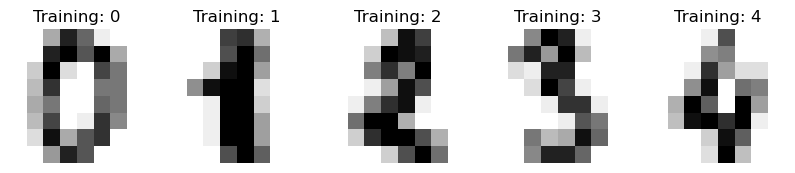

In [3]:
import matplotlib.pyplot as plt
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

<h1>Question 0</h1>

Split the digits.data and digits.target into train and test data. Create a dummy classifier for the digits data, with a strategy of "most_frequent", and print the score on test data. 

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

X = digits.data
y = digits.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# Fit the dummy classifier to the train data
dummy.fit(X_train, y_train)

# Predict the test data
y_pred = dummy.predict(X_test)

# Print the accuracy score on the test data
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.07777777777777778


<h1>Question 1</h1>
Create a logistic regression model for the digits data and print the score on test data. Use metrics.classification_report to give a more detailed report of results.

In [12]:
from sklearn.metrics import classification_report

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the logistic regression model to the train data
logreg.fit(X_train, y_train)

# Predict the test data
y_pred = logreg.predict(X_test)

# Print the accuracy score on the test data
print('Accuracy:', accuracy_score(y_test, y_pred))

# Print a more detailed report of the results
print(classification_report(y_test, y_pred))

Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



c:\Users\simpe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h1>Question 2</h1>
Create a 3-way split of the data, using train_test_split. First split into trainval and test, and then split trainval into train and val. 

In [13]:
# Split the data into trainval and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Split the trainval set into train and val sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)


<h1>Question 3</h1>
Create a logistic regression classifier for the digits data. Write a loop that tries at least 4 values ranging from .001 to 1.0 for C. Use the val data to determine the best value. Then train on the combined train and val data, and score the resulting model on test. Use metrics.ConfusionMatrixDisplay.from_predictions to display a confusion matrix for all 10 classes. 

c:\Users\simpe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\simpe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Test accuracy: 0.975


c:\Users\simpe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\simpe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

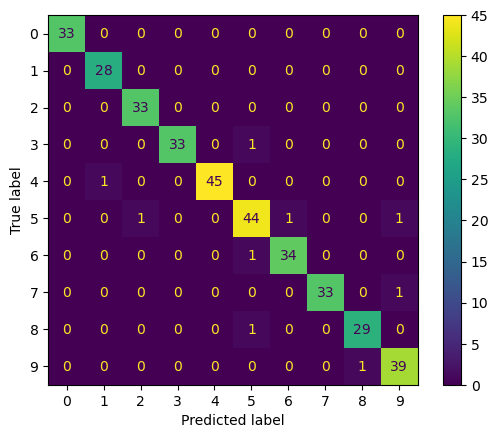

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Create an empty list to store the accuracy scores
accuracy_scores = []

# Create a list of C values to try
C_values = [0.001, 0.01, 0.1, 1.0]

# Write a loop to try different C values
for C in C_values:
    # Create a logistic regression classifier
    clf = LogisticRegression(C=C, solver='lbfgs', multi_class='auto')
    # Train the classifier on the trainval data
    clf.fit(X_trainval, y_trainval)
    # Get the predictions on the val data
    y_pred = clf.predict(X_val)
    # Calculate the accuracy score on the val data
    accuracy_scores.append(accuracy_score(y_val, y_pred))

# Find the best C value
best_C = C_values[accuracy_scores.index(max(accuracy_scores))]

# Create a logistic regression classifier with the best C value
clf = LogisticRegression(C=best_C, solver='lbfgs', multi_class='auto')
# Train the classifier on the trainval data
clf.fit(X_trainval, y_trainval)
# Get the predictions on the test data
y_pred = clf.predict(X_test)
# Calculate the accuracy score on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_accuracy)

confusion_matrix_ = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix_).plot()


<h1>Question 4</h1>
Create a Decision Tree classifier for the digits data. Write a loop that tries values of 1 through 20 for maximum depth. Use the val data to determine the best value. 

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Create an empty list to store the accuracy scores
accuracy_scores = []

# Create a list of maximum depth values to try
max_depth_values = list(range(1, 21))

# Write a loop to try different maximum depth values
for max_depth in max_depth_values:
    # Create a Decision Tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth)
    # Train the classifier on the trainval data
    clf.fit(X_trainval, y_trainval)
    # Get the predictions on the val data
    y_pred = clf.predict(X_val)
    # Calculate the accuracy score on the val data
    accuracy_scores.append(accuracy_score(y_val, y_pred))

# Find the best maximum depth value
best_max_depth = max_depth_values[accuracy_scores.index(max(accuracy_scores))]
print("best max_depth: ", best_max_depth)

best max_depth:  13


<h1>Question 5</h1>
Now train the best decision tree model on the combined train and val data, and score the resulting model on test.  
Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.


              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.81      0.79      0.80        28
           2       0.93      0.85      0.89        33
           3       0.78      0.91      0.84        34
           4       0.77      0.87      0.82        46
           5       0.93      0.89      0.91        47
           6       0.92      0.97      0.94        35
           7       0.79      0.88      0.83        34
           8       0.90      0.63      0.75        30
           9       0.85      0.85      0.85        40

    accuracy                           0.86       360
   macro avg       0.87      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360



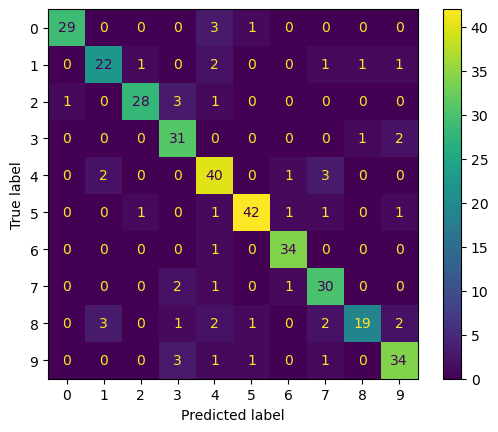

In [17]:
# Create the best Decision Tree classifier
best_clf = DecisionTreeClassifier(max_depth=best_max_depth)
# Train the classifier on the combined train and val data
best_clf.fit(X_trainval, y_trainval)
# Get the predictions on the test data
y_pred = best_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a ConfusionMatrixDisplay object
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
# Display the confusion matrix
conf_matrix_display.plot()

<h1>Question 6</h1>
Create a Random Forest classifier for the digits data. Use the val data to determine the best values for 
<ul>
    <li>number of estimators (from 50 to 500 by 50s)</li>
    <li>Max depth (from 10 to 50 by 10s)</li>
    </ul>
        

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Lists to store the scores for each combination of hyperparameters
scores = []
best_score = 0
best_params = {'n_estimators':0, 'max_depth':0}

# Loop through different values of n_estimators
for n_estimators in range(50, 501, 50):
    # Loop through different values of max_depth
    for max_depth in range(10, 51, 10):
        # Create a Random Forest classifier
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        # Train the classifier on the trainval data
        clf.fit(X_trainval, y_trainval)
        # Get the predictions on the val data
        y_pred = clf.predict(X_val)
        # Calculate the accuracy score
        score = accuracy_score(y_val, y_pred)
        scores.append(score)
        # Update the best parameters if necessary
        if score > best_score:
            best_score = score
            best_params['n_estimators'] = n_estimators
            best_params['max_depth'] = max_depth

# Create the best Random Forest classifier
best_clf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
# Train the classifier on the combined trainval data
best_clf.fit(X_trainval, y_trainval)
# Get the predictions on the test data
y_pred = best_clf.predict(X_test)
# Calculate the accuracy score on the test data
test_score = accuracy_score(y_test, y_pred)
print("Test score:", test_score)



Test score: 0.9777777777777777


<h1>Question 7</h1>
Now train the best random forest model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

Best parameters:  {'max_depth': 20, 'n_estimators': 200}
Test score:  0.975
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360



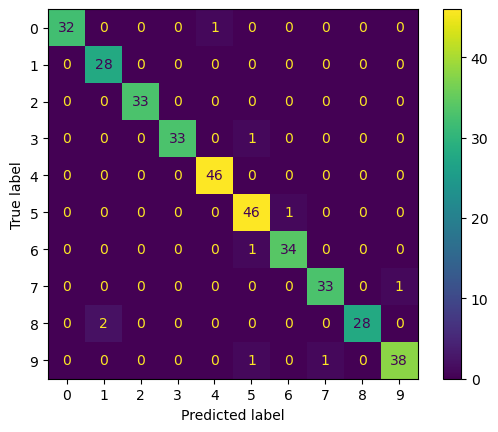

In [20]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter range to search
param_grid = {'n_estimators':range(50, 550, 50), 'max_depth':range(10, 60, 10)}

# Use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Train the model using the best parameters on the combined train and val data
rf_best = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'])
rf_best.fit(X_trainval, y_trainval)

# Score the model on test data
y_pred = rf_best.predict(X_test)
score = rf_best.score(X_test, y_test)
print("Test score: ", score)

# Use classification_report to display detailed results
print(classification_report(y_test, y_pred))

# Use confusion_matrix to display a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


# <h1>Question 8</h1>
Create a MLP classifier for the digits data. Use the val data to determine the best values for 
hidden layer sizes. Try values from (10,10) to (210,210), increasing by 50s. You can use two nested loops for variables H1 and H2, and then assign (H1,H2) to the parameter hidden_layer_sizes.
<p> Print the best values for the two hidden layer sizes</p>
    
        

In [21]:
from sklearn.neural_network import MLPClassifier

# Create an MLP classifier
mlp = MLPClassifier()

# Define the parameter range to search
param_grid = {'hidden_layer_sizes': [(H1, H2) for H1 in range(10, 260, 50) for H2 in range(10, 260, 50)]}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)


c:\Users\simpe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\simpe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\simpe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\simpe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\simpe\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Best parameters:  {'hidden_layer_sizes': (60, 210)}


<h1>Question 9</h1>

Now train the best mlp model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



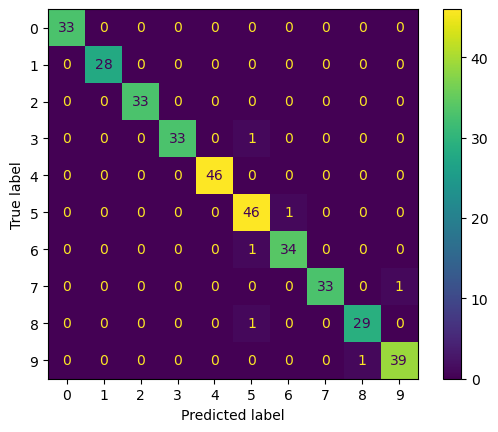

In [22]:
# Get the best parameters from grid search
best_params = grid_search.best_params_

# Train the model on the combined train and val data
mlp = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'])
mlp.fit(X_trainval, y_trainval)

# Predict on the test data
y_pred = mlp.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=np.arange(10))
disp = disp.plot()
